In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# All font sizes are set to 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15

In [14]:
np.random.seed(121)   # in dastor baes mishavad adadhae randome hamishe yeksan bashand

N = 1000
std = 0.6
bananas = pd.DataFrame({
    'length': np.random.normal(8, std, N),
    'width': np.random.normal(4, std, N),
    'class': np.zeros(N, dtype='int')}
)

apples = pd.DataFrame({
    'length': np.random.normal(6, std, N),
    'width': np.random.normal(6, std, N),
    'class': np.ones(N, dtype='int')}
)

fruits = pd.concat([bananas, apples])
apples.to_csv("output/appledataset.csv")
bananas.to_csv("output/bananadataset.csv")
fruits.to_csv("output/fruitsdataset.csv")

Text(0, 0.5, 'Width')

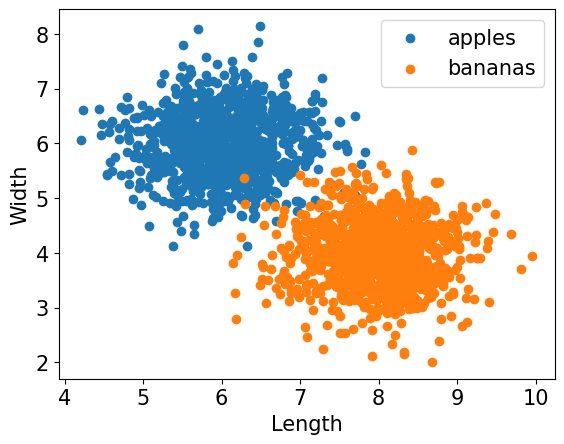

In [3]:
plt.scatter(x=apples['length'], y=apples['width'], label='apples')
plt.scatter(x=bananas['length'], y=bananas['width'], label='bananas')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Width')

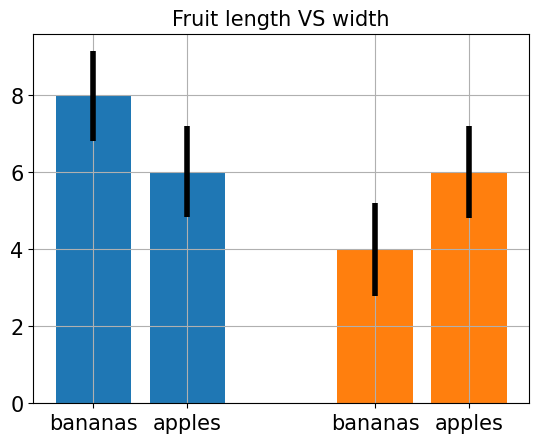

In [10]:
labels = ['bananas', 'apples', 'bananas', 'apples']
x = [1, 1.5, 2.5, 3.0]
height = [fruits.loc[fruits['class'] == 0, 'length'].mean(),     
          fruits.loc[fruits['class'] == 1, 'length'].mean(),
          fruits.loc[fruits['class'] == 0, 'width'].mean(),
          fruits.loc[fruits['class'] == 1, 'width'].mean()]
yerr = [2*fruits.loc[fruits['class'] == 0, 'length'].std(),
        2*fruits.loc[fruits['class'] == 1, 'length'].std(),
        2*fruits.loc[fruits['class'] == 0, 'width'].std(),
        2*fruits.loc[fruits['class'] == 1, 'width'].std()]
color = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']

plt.bar(x=x,
        height=height,
        color=color,
        width=0.4,
        error_kw={'lw': 4},
        yerr=yerr)
plt.xticks(ticks=x, labels=labels)
plt.title('Fruit length VS width')

plt.grid()

Box diagram

Text(0.5, 1.0, 'Length Distribution ')

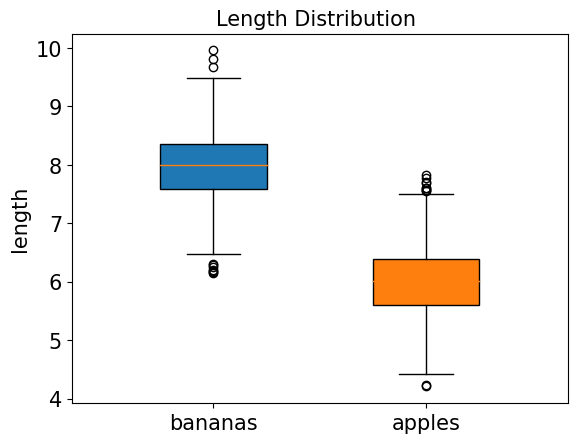

In [20]:
fea = 'length'
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 0],
            patch_artist=True, boxprops={'facecolor': 'tab:blue'},
            positions=[0], labels=['bananas'], widths=[0.15])
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 1],
            patch_artist=True, boxprops={'facecolor': 'tab:orange'},
            positions=[0.3], labels=['apples'], widths=[0.15])
plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')

histogram

Text(0.5, 0, 'Width')

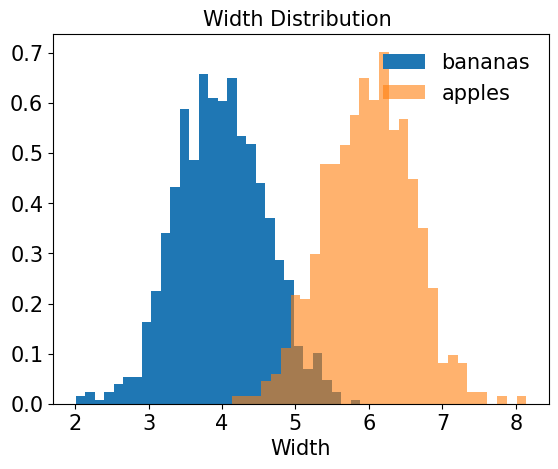

In [25]:
fea = 'width'

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples', alpha=0.6)
plt.legend(frameon=False)
plt.title('Width Distribution ')
plt.xlabel('Width')

Joint distribution histogram

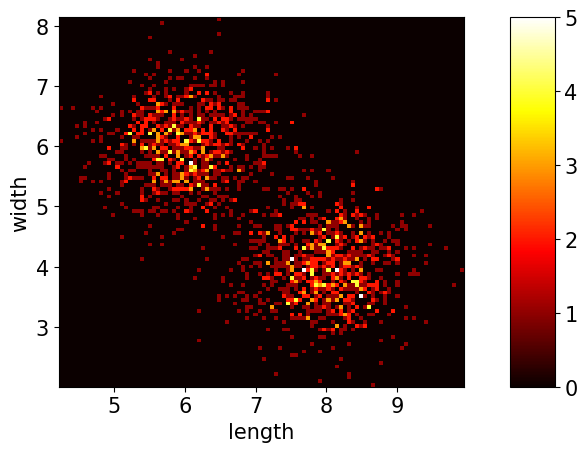

In [45]:
fig, (ax, cax) =plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(
    x='length', y='width', bins=100, data=fruits, cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')
 
plt.colorbar(mappable=mappable, cax=cax, ax=ax)

Feature generation and selection

Aspect ratio

Text(0.5, 0, 'L/W ratio')

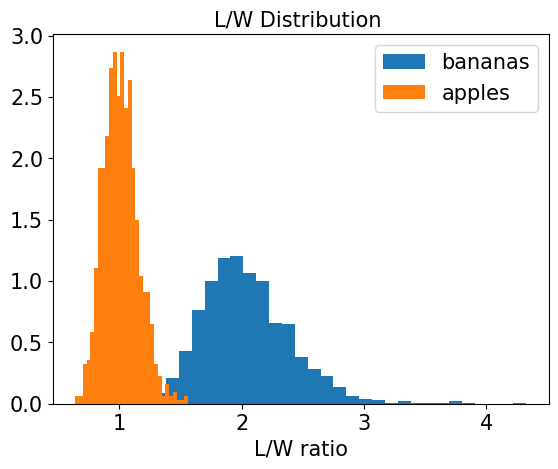

In [48]:
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']
fruits.to_csv("output/fruitsdataset.csv")
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples',)
plt.legend()
plt.title('L/W Distribution ')
plt.xlabel('L/W ratio')

the measure of area

Text(0.5, 0, 'Area')

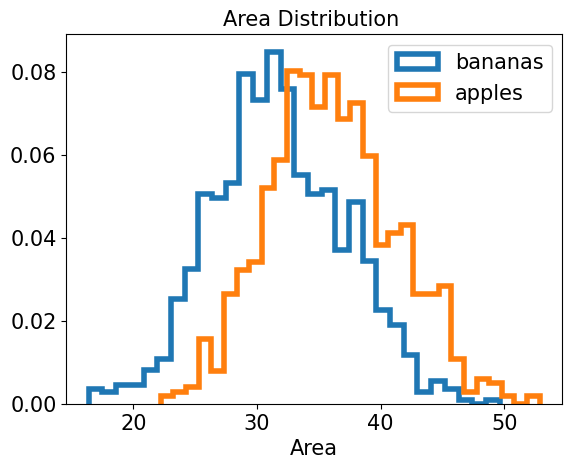

In [53]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
fruits.to_csv("output/fruitsdataset.csv")
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step',lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('Area Distribution ')
plt.legend()
plt.xlabel('Area')

Perimeter:

Text(0.5, 0, 'Circumference')

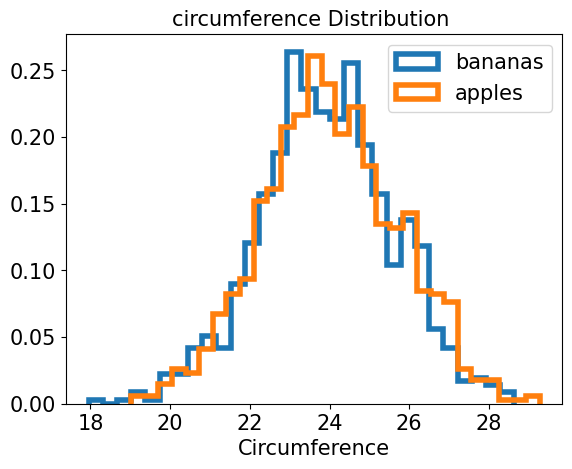

In [54]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
fruits.to_csv("output/fruitsdataset.csv")
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('circumference Distribution ')
plt.legend()
plt.xlabel('Circumference')

محیط و مساحت ویژگی های خوبی نیستند چون دیتاها به میزان زیادی هم پوشانی دارند که باعث می شود قابلیت تفکیک پذیری نداشته باشند. اما ویژگی نسبت طول به عرض خوب است، چون دیتا های سیب و موز هم پوشانی بسیار کمی با هم دارند.

Significance test:


In [55]:
from scipy import stats

fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=82.43842566108299, pvalue=0.0)

In [56]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-18.339795548775278, pvalue=1.4737736564093967e-69)

In [57]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-1.3170522756675043, pvalue=0.1879721312693096)